In [2]:
#str.endswith?
import pandas

In [7]:
df = pandas.read_csv('static/actors.csv')
df.info()
df['name'].dtype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
name     6 non-null object
birth    6 non-null int64
alive    6 non-null bool
dtypes: bool(1), int64(1), object(1)
memory usage: 182.0+ bytes


dtype('O')

In [10]:
2018 - df['birth']

0    76
1    75
2    75
3    77
4    78
5    79
Name: birth, dtype: int64

In [11]:
df['birth'] //100 + 1

0    20
1    20
2    20
3    20
4    20
5    20
Name: birth, dtype: int64

In [12]:
df['birth'] < 1920

0    False
1    False
2    False
3    False
4    False
5    False
Name: birth, dtype: bool

In [16]:
df['name'] + ['(1)','(2)','(3)','(4)','(5)','(6)']

0      Terry(1)
1    Michael(2)
2       Eric(3)
3     Graham(4)
4      Terry(5)
5       John(6)
Name: name, dtype: object

In [17]:
df['name'].str.upper()

0      TERRY
1    MICHAEL
2       ERIC
3     GRAHAM
4      TERRY
5       JOHN
Name: name, dtype: object

In [18]:
df['name'][2:-2]

2      Eric
3    Graham
Name: name, dtype: object

In [19]:
df['name'][df['birth'] > 1940]

0      Terry
1    Michael
2       Eric
3     Graham
Name: name, dtype: object

In [20]:
(df['birth'] > 1940) & (df['birth'] < 1943)

0     True
1    False
2    False
3     True
4    False
5    False
Name: birth, dtype: bool

In [21]:
df['name'][(df['birth'] > 1940) & (df['birth'] < 1943)]

0     Terry
3    Graham
Name: name, dtype: object

In [25]:
df['birth'].mean()
df['birth'].sum()
df['birth'].nunique()
df['birth'].kurtosis()

-1.4812500000001654

In [27]:
df['name'].apply(lambda x : ''.join(reversed(x)))

0      yrreT
1    leahciM
2       cirE
3     maharG
4      yrreT
5       nhoJ
Name: name, dtype: object

In [28]:
df[-1:]

,name,birth,alive
5,John,1939,True


In [29]:
df[['name', 'alive']]

,name,alive
0,Terry,True
1,Michael,True
2,Eric,True
3,Graham,False
4,Terry,True
5,John,True


In [30]:
df.loc[5]

name     John
birth    1939
alive    True
Name: 5, dtype: object

In [31]:
df.loc[2:4]

,name,birth,alive
2,Eric,1943,True
3,Graham,1941,False
4,Terry,1940,True


In [40]:
df.loc[4:5, ['name','alive','alive']]

,name,alive,alive
4,Terry,True,True
5,John,True,True


In [43]:
df.iloc[3:5, 1:-1]

,birth
3,1941
4,1940


In [44]:
df.iloc[2:4].loc[:, "alive"]

2     True
3    False
Name: alive, dtype: bool

In [46]:
actors = pandas.read_csv('static/actors.csv')

In [48]:
actors.index

RangeIndex(start=0, stop=6, step=1)

In [49]:
actors.columns

Index(['name', 'birth', 'alive'], dtype='object')

In [50]:
actors.index = actors['name']

In [51]:
actors.index

Index(['Terry', 'Michael', 'Eric', 'Graham', 'Terry', 'John'], dtype='object', name='name')

In [52]:
actors.sort_index()

,name,birth,alive
name,,,
Eric,Eric,1943,True
Graham,Graham,1941,False
John,John,1939,True
Michael,Michael,1943,True
Terry,Terry,1942,True
Terry,Terry,1940,True


In [58]:
act = actors.set_index(['name', 'birth'], verify_integrity=True)
act

,,alive
name,birth,
Terry,1942,True
Michael,1943,True
Eric,1943,True
Graham,1941,False
Terry,1940,True
John,1939,True


In [59]:
act.loc[('Terry', 1940), 'alive']

True

In [62]:
pandas.MultiIndex.from_tuples([('a', 4), ('a', 5)], names=['jedna', 'dva'])

MultiIndex(levels=[['a'], [4, 5]],
           labels=[[0, 0], [0, 1]],
           names=['jedna', 'dva'])

In [63]:
last_names = pandas.Series(['Gillian', 'Jones', 'Cleveland'], index = [('Terry', 1940), ('Terry', 1942), ('Carol', 1942)])

In [64]:
act['last_name'] = last_names

In [65]:
act

,,alive,last_name
name,birth,,
Terry,1942,True,Jones
Michael,1943,True,NaN
Eric,1943,True,NaN
Graham,1941,False,NaN
Terry,1940,True,Gillian
John,1939,True,NaN


In [66]:
'(' + act['last_name'] + ')'

name     birth
Terry    1942       (Jones)
Michael  1943           NaN
Eric     1943           NaN
Graham   1941           NaN
Terry    1940     (Gillian)
John     1939           NaN
Name: last_name, dtype: object

In [67]:
act['last_name'].isnull()

name     birth
Terry    1942     False
Michael  1943      True
Eric     1943      True
Graham   1941      True
Terry    1940     False
John     1939      True
Name: last_name, dtype: bool

In [68]:
~act['last_name'].isnull()

name     birth
Terry    1942      True
Michael  1943     False
Eric     1943     False
Graham   1941     False
Terry    1940      True
John     1939     False
Name: last_name, dtype: bool

In [69]:
act.fillna('-')

,,alive,last_name
name,birth,,
Terry,1942,True,Jones
Michael,1943,True,-
Eric,1943,True,-
Graham,1941,False,-
Terry,1940,True,Gillian
John,1939,True,-


In [70]:
act.dropna()

alive last_name
name  birth                 
Terry 1942    True     Jones
      1940    True   Gillian

In [81]:
sposes = pandas.read_csv('static/spouses.csv')
actr = pandas.read_csv('static/actors.csv')
actr.merge(sposes)

,name,birth,alive,spouse_name
0,Terry,1942,True,Alison Telfer
1,Terry,1942,True,Anna Söderström
2,Michael,1943,True,Helen Gibbins
3,Eric,1943,True,Lyn Ashley
4,Eric,1943,True,Tania Kosevich
5,Graham,1941,False,David Sherlock
6,Terry,1940,True,Maggie Westo
7,John,1939,True,Connie Booth
8,John,1939,True,Barbara Trentham
9,John,1939,True,Alyce Eichelberger


In [77]:
act

,,alive,last_name
name,birth,,
Terry,1942,True,Jones
Michael,1943,True,NaN
Eric,1943,True,NaN
Graham,1941,False,NaN
Terry,1940,True,Gillian
John,1939,True,NaN


In [84]:
import itertools
import random
random.seed(0)

months = pandas.date_range('2015-01', '2016-12', freq='M')
categories = ['Electronics', 'Power Tools', 'Clothing']
data = pandas.DataFrame([{'month': a, 'category': b, 'sales': random.randint(-1000, 10000)}
                          for a, b in itertools.product(months, categories)
                          if random.randrange(20) > 0])

data.head()
data.describe()

,sales
count,67.000000
mean,4795.552239
std,3101.026552
min,-735.000000
25%,2089.000000
50%,4448.000000
75%,7874.000000
max,9817.000000


In [85]:
data1 = data.set_index(['category', 'month'])
data1.head()

,,sales
category,month,
Electronics,2015-01-31,5890
Power Tools,2015-01-31,3242
Clothing,2015-01-31,6961
Electronics,2015-02-28,3969
Power Tools,2015-02-28,4866


In [86]:
unstacked = data1.unstack('month')

In [88]:
unstacked.columns = unstacked.columns.droplevel()

In [93]:
unstacked.loc[['Electronics', 'Power Tools'], '2016-03':'2016-05'].sum()
#unstacked from row index to column index

month
2016-03-31     4978.0
2016-04-30    15846.0
2016-05-31     1764.0
dtype: float64

In [94]:
import matplotlib

In [95]:
%matplotlib inline

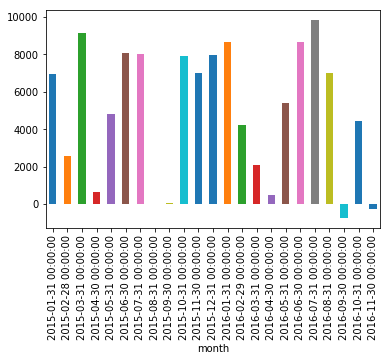

In [97]:
unstacked.loc['Clothing'].plot(kind='bar')

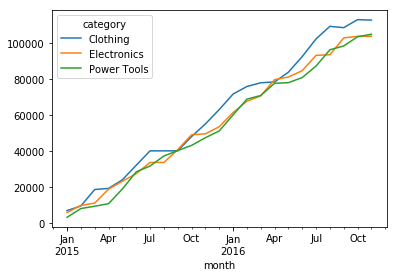

In [104]:
unstacked.T.fillna(0).cumsum().plot()

In [111]:
#data.groupby(['category', 'month']).agg(['mean', 'median', sum, pandas.Series.kurtosis])
data.head()
bin_size = 10000
by_month = data.groupby('month').sum()
by_thousands = by_month.groupby(by_month['sales']//bin_size * bin_size).agg(['count', 'sum'])
by_thousands

sales        
      count     sum
sales              
0         5   30651
10000    15  218870
20000     3   71781

In [112]:
by_thousands.to_csv('test.csv')